<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/Deep_Learning_Stock_Price_Prediction_Time_Series_Forecasting_with_Long_Short_Term_Memory_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [21]:
# Define stock symbol and timeframe
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'

# Download historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Select the 'Close' prices for simplicity
stock_data = stock_data[['Close']]


[*********************100%%**********************]  1 of 1 completed


In [22]:
# Handle missing data
stock_data = stock_data.dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data.values.reshape(-1, 1))

# Create time series sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 10
X = create_sequences(scaled_data, sequence_length)


In [23]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
# Assuming 'target' is the column you want to predict (e.g., next day's closing price)
y = scaled_data[sequence_length:]

# Model fitting
model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
95/95 [==============================] - 5s 15ms/step - loss: 0.0069
Epoch 2/50
95/95 [==============================] - 2s 17ms/step - loss: 2.1664e-04
Epoch 3/50
95/95 [==============================] - 1s 15ms/step - loss: 2.0010e-04
Epoch 4/50
95/95 [==============================] - 2s 18ms/step - loss: 2.3138e-04
Epoch 5/50
95/95 [==============================] - 1s 14ms/step - loss: 2.0627e-04
Epoch 6/50
95/95 [==============================] - 2s 18ms/step - loss: 2.0437e-04
Epoch 7/50
95/95 [==============================] - 2s 19ms/step - loss: 2.0903e-04
Epoch 8/50
95/95 [==============================] - 2s 21ms/step - loss: 2.3997e-04
Epoch 9/50
95/95 [==============================] - 1s 12ms/step - loss: 2.1213e-04
Epoch 10/50
95/95 [==============================] - 1s 9ms/step - loss: 2.1645e-04
Epoch 11/50
95/95 [==============================] - 1s 9ms/step - loss: 4.0436e-04
Epoch 12/50
95/95 [==============================] - 1s 10ms/step - loss: 2.6733

In [25]:
# Prepare test data
test_data = yf.download(stock_symbol, start='2022-01-02', end='2022-02-01')[['Close']]
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Create sequences for test data
X_test = create_sequences(scaled_test_data, sequence_length)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get actual values
predicted_prices = scaler.inverse_transform(predictions)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 1s 713ms/step


In [26]:
# Evaluate the model's performance
mse = mean_squared_error(test_data[sequence_length:], predicted_prices)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 42.83388882088475


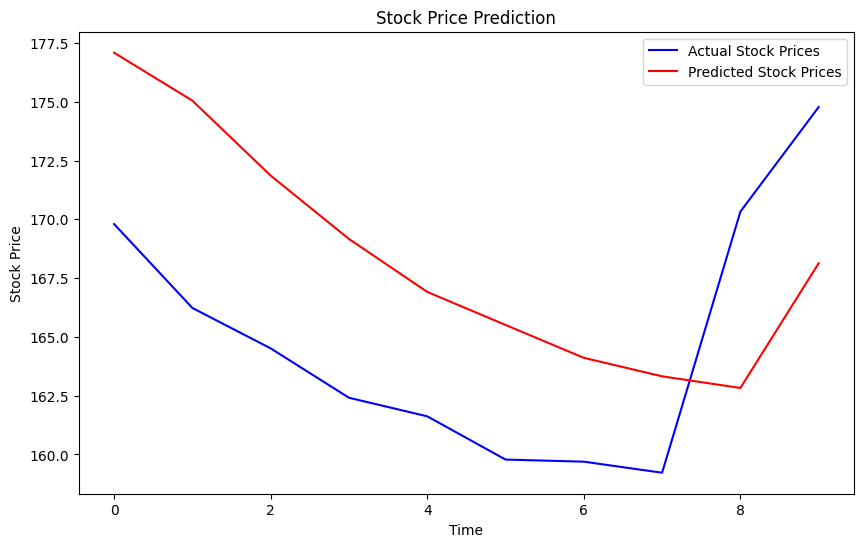

In [27]:
import matplotlib.pyplot as plt

# Inverse transform the scaled data to get the original values
original_test_data = scaler.inverse_transform(scaled_test_data)
original_predictions = scaler.inverse_transform(predictions)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(original_test_data[sequence_length:], label='Actual Stock Prices', color='blue')
plt.plot(original_predictions, label='Predicted Stock Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
